# load data and train using pipeline SVM

In [1]:
from sklearn import datasets
win=datasets.load_breast_cancer()
X=win.data
y=win.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
           ('pca', PCA(n_components=3)),
           ('clf', SVC(random_state=1))])

# Confusion Matrix

In [5]:
pipe_svc.fit(X_train, y_train)
print('Test accuracy: %.3f' % pipe_svc.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion Matrix \n',confmat)


Test accuracy: 0.921
Confusion Matrix 
 [[38  7]
 [ 2 67]]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# plot confusion Matrix

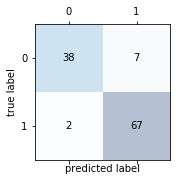

In [3]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j], 
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [ ]:
# Precision, Recall and F1-Score

In [6]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics  import recall_score, f1_score, classification_report
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('Classification report\n',classification_report(y_true=y_test, y_pred=y_pred))

Accuracy: 0.921
Precision: 0.905
Recall: 0.971
F1: 0.937
Classification report
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        45
           1       0.91      0.97      0.94        69

   micro avg       0.92      0.92      0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

